In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## 划分数据集

In [6]:
data = pd.read_csv('./data/processed_train.csv')
train_df,test_df = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

train_X = train_df[train_df.columns[1:]]
train_y = train_df[train_df.columns[:1]]

test_X = test_df[test_df.columns[1:]]
test_y = test_df[test_df.columns[:1]]

X = data[data.columns[1:]]
y = data['Survived']


## SVM(高斯核)

In [7]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.835820895522388

## SVM(线性)

In [8]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8171641791044776

## LR

In [9]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8171641791044776

## 决策树

In [10]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8022388059701493

## KNN

In [25]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.835820895522388

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


<built-in method max of numpy.ndarray object at 0x11f999620>


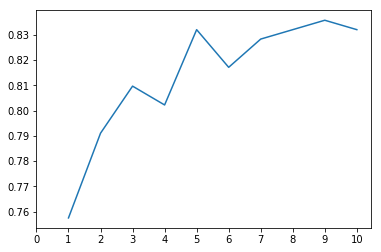

In [24]:
predict_arr = pd.Series()
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    predict_arr = predict_arr.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

# 绘图展示
index = list(range(1,11))
plt.plot(index,predict_arr)
plt.xticks(list(range(0,11)))
print(predict_arr.values.max)
    
    

## 朴素贝叶斯

In [26]:
model = GaussianNB()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8134328358208955

## 随机森林

In [27]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8208955223880597

现在来看，每个单模型的AUC差不多，也没有对模型的超参数进行调参。数据量又没有那么大，所以还是建议做交叉验证的。

## 交叉验证

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [35]:
kfold = KFold(n_splits=10,random_state=2019)
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

mean = []
std = []
auc = []
for model in models:
    res = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    mean.append(res.mean())
    std.append(res.std())
    auc.append(res)
    
res_df = pd.DataFrame({'Mean':mean,'Std':std},index=classifiers)
res_df


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

,Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.811498,0.031318
Naive Bayes,0.801386,0.028999
Random Forest,0.817054,0.034856


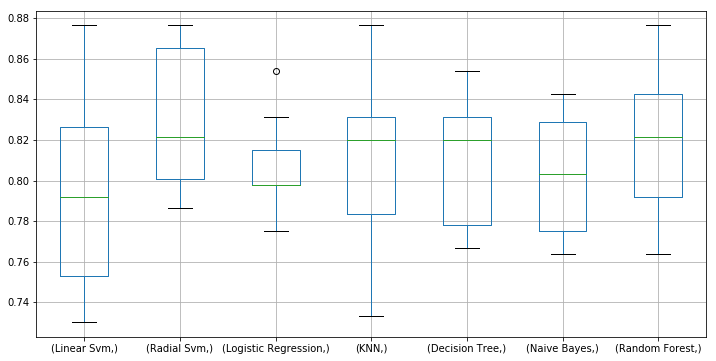

In [38]:
# 绘制各个算法相应的箱型图
plt.subplots(figsize=(12,6))
box = pd.DataFrame(auc,index=[classifiers])
box.T.boxplot()

Text(0.5, 1.0, 'Average CV Mean Accuracy')

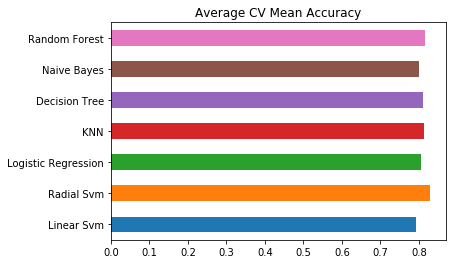

In [42]:
res_df['Mean'].plot.barh()
plt.title('Average CV Mean Accuracy')


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

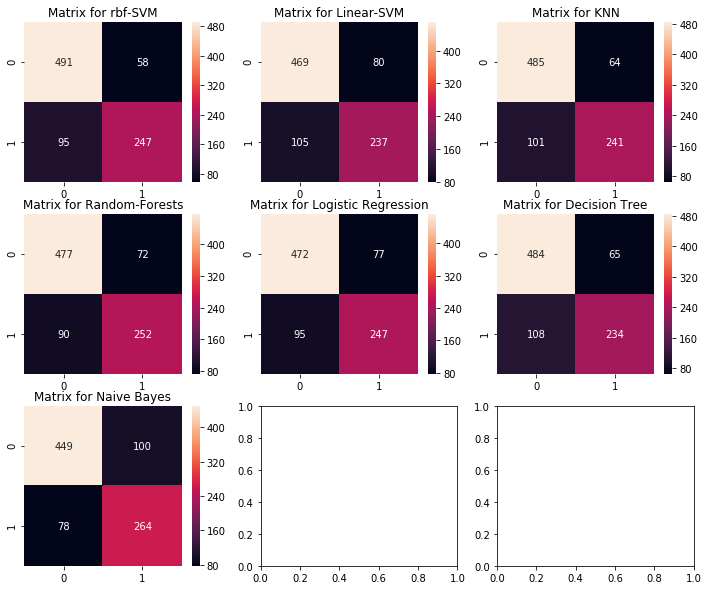

In [47]:
## 绘制混淆矩阵，给出正确分类和不正确分类的数量
fig,ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


## 利用网格搜索进行超参数设定

In [48]:
from sklearn.model_selection import GridSearchCV

In [51]:
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf','linear']

hyper = {'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_estimator_)
print(gd.best_score_)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 240 candidates, totalling 720 fits
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8282828282828283


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   10.2s finished


C = 0.5, gamma = 0.1

In [50]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   12.4s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
